In [2]:
%matplotlib inline
import matplotlib, re
from matplotlib_venn import venn3, venn3_unweighted
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

# Set the visualization settings
matplotlib.rcParams['axes.titlesize'] = 'xx-large'
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
##### IN SILICO DIGEST (theoretical portion) ######
def import_cpdt(source,wantFull):
    '''set up the counters to fill the theoretical peptides with observed counts'''
    cpdt_pep={}
    full_seqs={}
    for cpf in source:
        with open(cpf) as c:
            for line in c:
                if line.startswith('>'):
                    key=line.strip()[1:]
                    key=get_id(key)
                    cpdt_pep[key]={}
                    full_seqs[key]=''
                elif 'PEPTIDE' in line:
                    lp=line.split('PEPTIDE ')[1]
                    lp=lp.split(':')[0]
                    cpdt_pep[key][lp]=0
                elif 'PEPTIDE' not in line:
                    full_seqs[key]=line.strip()
    if wantFull:
        return(cpdt_pep, full_seqs)
    return(cpdt_pep)


def get_id(idstring):
    i=idstring
    if '|m.' in i:
        i=i.split('|m.')[0]
    elif 'ENSP' in i:
        i=i.split('|')[1]
    return(i)

all_cpdt_source=['/data/na12878/spectra/insilico_digest/all_reference.withheader.cpdt']
cpdt_mutations=['/data/na12878/spectra/insilico_digest/all_snv_differing_peptides.cpdt']  
mut_cpdt_pep=import_cpdt(cpdt_mutations,False)
cpdt_pep,full_seqs=import_cpdt(all_cpdt_source,True)
filled_mut_cpdt=mut_cpdt_pep
filled_cpdt=cpdt_pep

In [23]:
def collect_probs(cpdtfile):
    probabilities=[]
    with open(cpdtfile) as handle:
        for line in handle:
            if 'PEPTIDE ' in line:
                pep=line.split('PEPTIDE ')[1]
                pep=pep.split(':')[0]
                if len(pep)>2:
                    prob=line.strip().split(': ')[1]
                    probabilities.append(float(prob))
    return(probabilities)

probs_ref=collect_probs('/data/na12878/spectra/insilico_digest/all_reference.withheader.cpdt')
probs_snv=collect_probs('/data/na12878/spectra/insilico_digest/all_snv_differing_peptides.cpdt')
len(probs_ref)

0.691788

Text(0.5,1,'Detectability of all peptides')

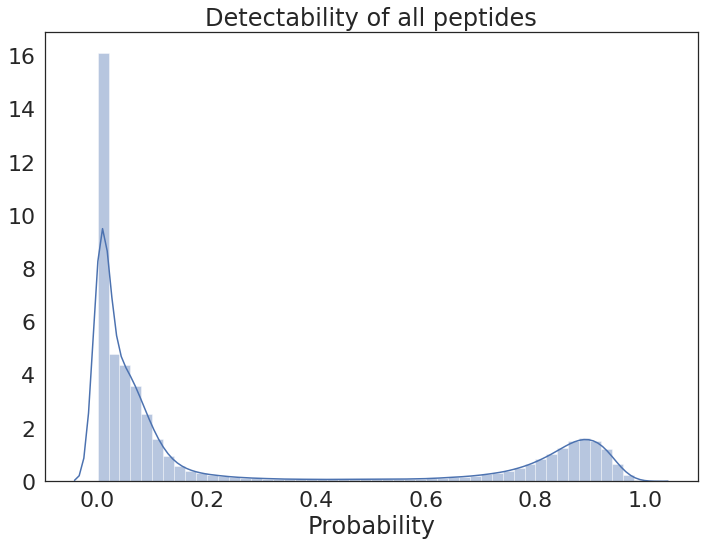

In [41]:
sns.set(font_scale = 2)
sns.set_style(style='white')
plt.figure(0)
ax=sns.distplot(probs_ref)
ax.set_xlabel('Probability')
ax.set_title('Detectability of all peptides')
plt.figure(1)
snvp=sns.distplot(probs_snv)
snvp.set_xlabel('Probability')
snvp.set_title('Detectability of SNV peptides')

Text(0.5,1,'Detectability of SNV peptides')

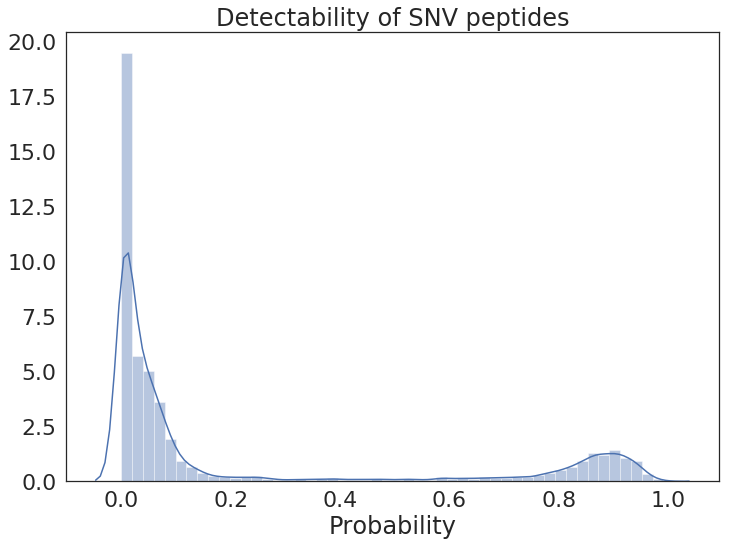

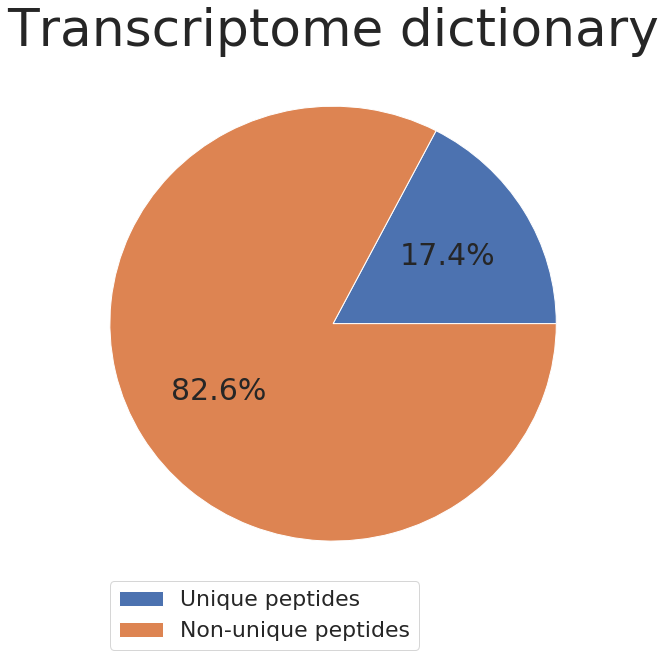

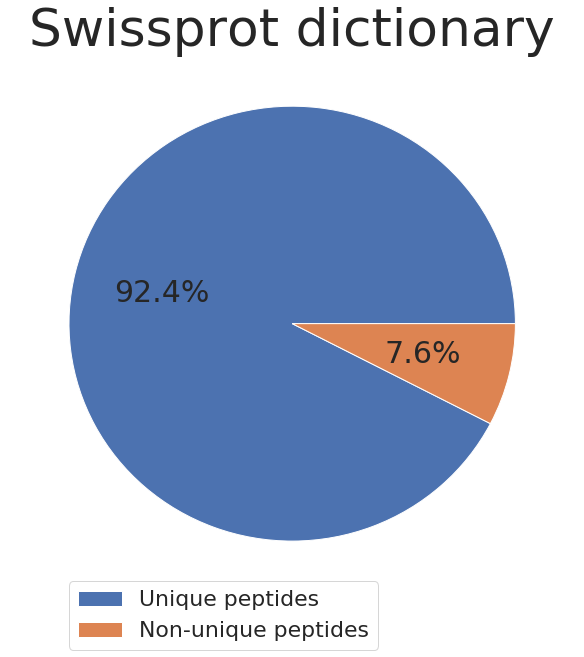

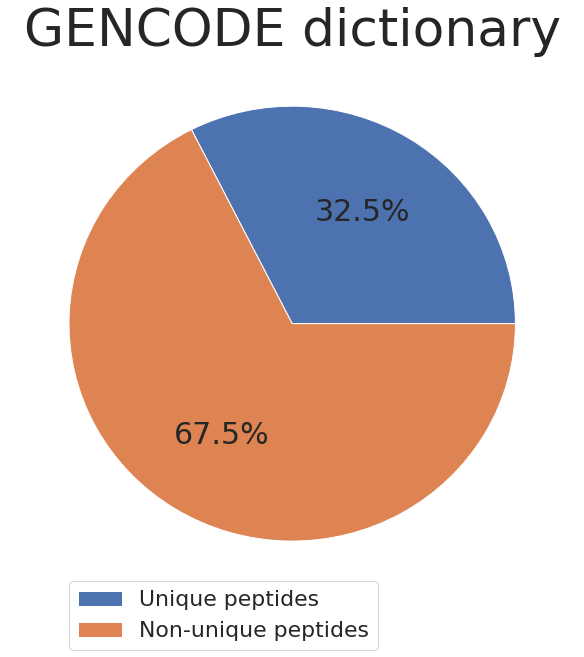

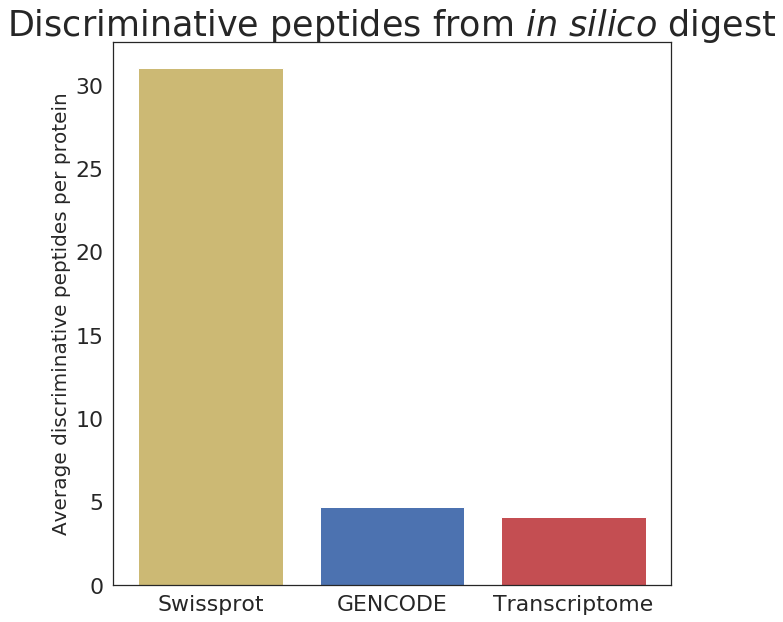

In [48]:
#plot for in silico digest
matplotlib.rcParams['axes.titlesize'] = 'xx-large'
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
labels='Unique peptides','Non-unique peptides'
plt.figure(0)
plt.pie([1079726,6217462-1079726], autopct='%1.1f%%')
plt.title('Transcriptome dictionary')
plt.legend(labels,loc = (0.1,-0.1))
plt.figure(1)
plt.pie([654057,707890-654057], autopct='%1.1f%%')
plt.title('Swissprot dictionary')
plt.legend(labels,loc = (0.1,-0.1))
plt.figure(2)
plt.pie([2576625,7939809-2576625], autopct='%1.1f%%')
plt.title('GENCODE dictionary')
plt.legend(labels,loc = (0.1,-0.1))
plt.figure(3)
discriminative_sp=510708/16446
discriminative_gc=130931/28052
discriminative_ont=61942/15136
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35
plt.bar(index,[discriminative_sp,discriminative_gc,discriminative_ont],tick_label=['Swissprot','GENCODE','Transcriptome'],color=['y','b','r'])
plt.tick_params(labelsize=22)
plt.ylabel('Average discriminative peptides per protein',fontsize=20)
plt.title('Discriminative peptides from $\it{in}$ $\it{silico}$ digest',fontsize=35)
plt.show()

In [4]:
#import ionbot hits
def read_df_in_chunks(filename, chunksize):
    # read the large csv file with specified chunksize 
    df_chunk = pd.read_csv(filename, chunksize=chunksize) # chunksize represents number of rows read per chunk

    chunk_list = []  # append each chunk df here 

    # Each chunk is in df format
    for chunk in df_chunk:  
        # perform data filtering 
        chunk_filter = chunk_preprocessing(chunk)

        # Once the data filtering is done, append the chunk to list
        chunk_list.append(chunk_filter)
        #chunk_list.append(chunk)

    # concat the list into dataframe 
    df_concat = pd.concat(chunk_list) # this is your final dataframe
    
    return(df_concat)

def chunk_preprocessing(df_chunk):
    new_chunk=df_chunk[(df_chunk['ri_126.1277']>0) & (df_chunk['q_value']<=0.01) & (df_chunk['DB']=='T')]
    new_chunk=new_chunk[['scan_id','charge','precursor_mass','matched_peptide','modifications','ionbot_psm_score','DB','unexpected_modification','ms2pip_pearsonr','proteins','num_unique_pep_ids']]
    return(new_chunk)

ib_mutout_human=read_df_in_chunks('/data/na12878/spectra/identifications/flair_only_with_mutation_WRONG_SEQS/Linfeng_011011_HapMap35.mgf.ionbot.csv',1000)
ib_mutout_ont=read_df_in_chunks('/data/na12878/spectra/identifications/gencode_ref/ref_only_with_mut/Linfeng_011011_HapMap35.mgf.ionbot.csv',1000)
ib_mutout_human_ont=read_df_in_chunks('/data/na12878/spectra/identifications/gencode_ref/ref_union_WRONG_ont_with_mut/Linfeng_011011_HapMap35.mgf.ionbot.csv',1000)


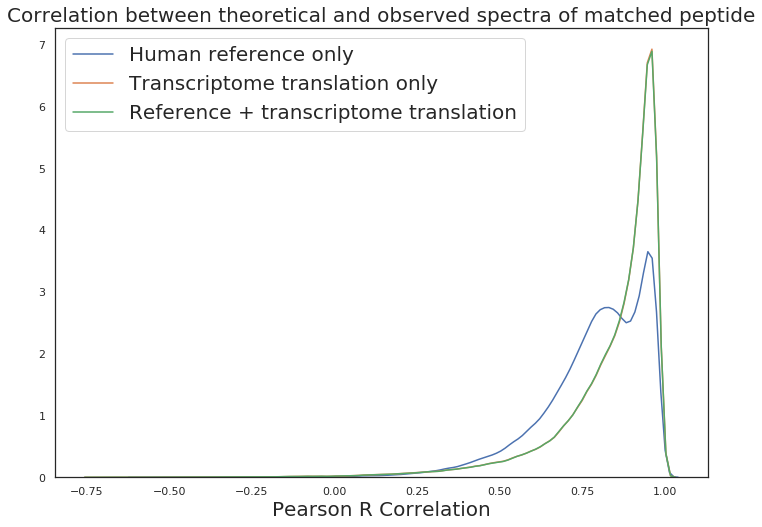

In [11]:
#plot score distributions from each of the spectral dictionaries, quality control
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='white')
plt.figure("Pearson R distribution")
#matplotlib.rcParams['axes.titlesize'] = 'xx-large'
#matplotlib.rcParams['axes.labelsize'] = 'x-large'
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
sns.distplot(ib_mutout_human['ms2pip_pearsonr'], hist=False, label='Human reference only',axlabel='Pearson R Correlation')
sns.distplot(ib_mutout_ont['ms2pip_pearsonr'], hist=False, label='Transcriptome translation only',axlabel='Pearson R Correlation')
sns.distplot(ib_mutout_human_ont['ms2pip_pearsonr'], hist=False, label='Reference + transcriptome translation',axlabel='Pearson R Correlation')

plt.legend(prop={'size':20})
plt.title('Correlation between theoretical and observed spectra of matched peptide',fontsize=20)
plt.xlabel('Pearson R Correlation',fontsize=20)
plt.show()

In [12]:
ib_mutout_human=chunk_preprocessing(ib_mutout_human)
ib_mutout_ont=chunk_preprocessing(ib_mutout_ont)
ib_mutout_human_ont=chunk_preprocessing(ib_mutout_human_ont)

In [49]:
ib_mutout_human_ont.head()

,scan_id,charge,precursor_mass,matched_peptide,modifications,ionbot_psm_score,DB,unexpected_modification,ms2pip_pearsonr,proteins,num_unique_pep_ids
10,211,4,1636.943,NRPAIVRGAAGGGGR,0|[737]tmt6plex||6|mut,4.015,T,A->V,0.845,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,16
11,53604,2,1347.695,QYNGVPLDGR,0|[737]tmt6plex||3|[7]deamidated[n],5.557,T,[7]deamidated[n],0.833,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,16
13,111129,3,1653.871,MDMSLDDIIK,0|[737]tmt6plex||1|[35]oxidation[m]||10|[737]t...,5.244,T,NaN,0.906,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,16
14,132008,3,3042.566,QYNGVPLDGRPMNIQLVTSQIDAQR,0|[737]tmt6plex||3|[7]deamidated[n],6.820,T,[7]deamidated[n],0.937,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,16
15,45615,3,1613.852,AGSQGARGGGAQAAAR,0|[737]tmt6plex||6|mut,5.822,T,G->A,0.943,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,16


In [5]:
len(cpdt_pep) #number of total proteins in the combination dictionary

158229

In [6]:
len(full_seqs)

158229

In [58]:
len(mut_cpdt_pep) #number of total proteins that have 1+ theoretical SNV peptides

18359

In [7]:
#fill theoretical peptide data structure with counts of observed
def fill_cpdt(pep,mod,ids,old_cpdt_pep):
    '''fill the data structure to match predicted (mutated) peptides to observed
    
    how many unique variant peptides are detected, from how many unique proteins?
    how many total instances of correct/incorrect variant peptides are detected?
    build up the dictionary with every iteration of the 
    '''
    cpdt_pep=old_cpdt_pep
    notfound=0
    for i in ids:
        found=False
        i=get_id(i)
        if i in cpdt_pep.keys():
            ispeplist=cpdt_pep[i]#make copy to mutate as you iterate
            for p,ct in cpdt_pep[i].items():
                if p==pep:
                    ct+=1
                    ispeplist[p]=ct
                    found=True
            cpdt_pep[i]=ispeplist
        if not found:
            notfound+=1
            ##this recovers a lot of peptides that would otherwise be filtered out
            # if '->' not in mod and found==False:
            #     if pep in full_seqs[i] or 'X' in full_seqs[i]:
            #         ispeplist[pep]=1
            #         cpdt_pep[i]=ispeplist
    if notfound==len(ids):
        missed=1
    else:
        missed=0
    return(cpdt_pep)

def bin_hits_by_source(scanid,ids,oro,ono,ob):
    '''sort peptide hits by their source dictionary'''
    ref_only=oro
    ont_only=ono
    both=ob
    ont=False
    ref=False
    for i in ids:
        if '|m.' in i: #assumes that the proteins from the reference were not generated with ANGEL
            ont=True
        elif 'ENST' in i:
            ref=True
    if ont and ref:
        both.add(scanid)
    elif ont:
        ont_only.add(scanid)
    elif ref:
        ref_only.add(scanid)
    return(ref_only,ont_only,both)

#print(quality_control(ib_mutout_human_ont,cpdt_pep))
#list_mutated,list_strange,list_nohits=quality_control(ib_mutout_human_ont,cpdt_pep)


In [10]:
#How many proteins are identified, and how many hits per protein
ref_only=set() #scan ids in the reference set
ont_only=set() #scan ids in the ont set
both=set() #scan ids that matched to both ref and ont proteins
hit_mut=0
mut_prots=set()
filled_cpdt=cpdt_pep
filled_mut_cpdt=mut_cpdt_pep
proteins_covered=Counter()
for row in ib_mutout_human_ont.iterrows():
    scanid=row[1][0]
    mod=str(row[1][7])
    pep=row[1][3]
    if '||' in row[1][9]:
        ids=row[1][9].split('||')
    else:
        ids=[row[1][9]]
    for idu in ids:
        proteins_covered[idu]+=1
    if '->' in mod:
        hit_mut+=1
        for i in ids:
            mut_prots.add(i)
        filled_mut_cpdt=fill_cpdt(pep,mod,ids,filled_mut_cpdt)
        #mut_cpdt_pep,mmissed=fill_cpdt(pep,mod,ids,mut_cpdt_pep)
        #hits_mut_missed+=mmissed
    filled_cpdt=fill_cpdt(pep,mod,ids,filled_cpdt)
    #cpdt_pep,missed=fill_cpdt(pep,mod,ids,cpdt_pep)
    #hits_missed+=missed
    ref_only,ont_only,both=bin_hits_by_source(scanid,ids,ref_only,ont_only,both)
known_mut_prots=set(filled_mut_cpdt.keys())
overlap=mut_prots.intersection(known_mut_prots)


NameError: name 'mutprots' is not defined

In [17]:
overlap=mut_prots.intersection(known_mut_prots)
mut_prots

{'ENSP00000458084.1|ENST00000566111.5|ENSG00000163565.18|OTTHUMG00000037108.6|OTTHUMT00000421719.3|IFI16-213|IFI16|83',
 '5e6ba753-1895-4ed3-8e18-945e75683287_ENSG00000111640.14-1|m.11439',
 'ENSP00000353863.4|ENST00000360647.8|ENSG00000163848.19|OTTHUMG00000159448.5|OTTHUMT00000355452.4|ZNF148-201|ZNF148|794',
 'ENSP00000475147.1|ENST00000604694.1|ENSG00000270647.5|OTTHUMG00000188384.2|OTTHUMT00000477055.1|TAF15-210|TAF15|214',
 'ENSP00000429084.1|ENST00000520539.5|ENSG00000104517.12|OTTHUMG00000164755.4|OTTHUMT00000380075.2|UBR5-207|UBR5|2799',
 'ENSP00000464066.1|ENST00000581384.5|ENSG00000161960.14|OTTHUMG00000108149.15|OTTHUMT00000441741.2|EIF4A1-217|EIF4A1|214',
 'caf3029f-4f36-4794-82a1-640f1e5dc3df_ENSG00000084207.15-2|m.10666',
 'd4d4bfd8-f0ad-40dd-b8c9-bb3b4dd8a411_ENSG00000115268.9|m.27245',
 'f809d1df-5016-4265-b755-0ec3e10d3b9a_ENSG00000147140.15|m.56108',
 'ENSP00000433364.1|ENST00000528906.5|ENSG00000185627.17|OTTHUMG00000119072.4|OTTHUMT00000385667.2|PSMD13-208|PSMD13|2

In [13]:
len(known_mut_prots)

18359

0 0 0


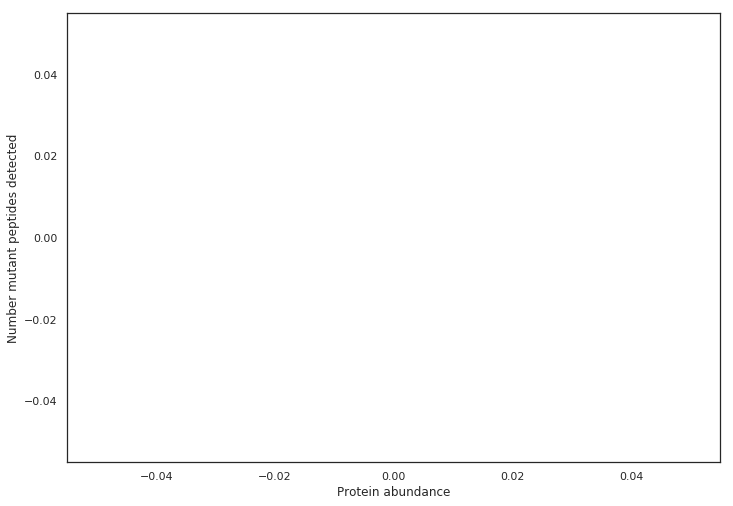

In [9]:
prot_abundance=[]
nr_mutant=[]
mut_proteins_detected=set()
num_peptides=0
num_occurences=0
for prot,peps in filled_mut_cpdt.items():
    if prot in filled_cpdt:
        sum_mut=0 #total number of detected mutant peptides
        sum_nonmut=0
        for pep,ct in peps.items():
            sum_mut+=ct
            if ct>0:
                mut_proteins_detected.add(prot)
                num_occurences+=ct
                num_peptides+=1
        if sum_mut>0: #only record the proteins with at least 1 detected mutation peptide
            nr_mutant.append(sum_mut)
            for pepc,ctc in cpdtpep[prot]:
                sum_nonmut+=ctc
            prot_abundance.append(sum_mut+sum_nonmut)
print(len(mut_proteins_detected),num_peptides,num_occurences)
#make plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='white')
ax=sns.scatterplot(prot_abundance,nr_mutant)
ax.set(xlabel='Protein abundance',ylabel='Number mutant peptides detected')
plt.show()


In [18]:
#measure the horizontal and vertical coverage
#horizontal- go through the peptide dictionary i have, construct the sequence and calculate the percent of coverage
#exclude if less than 5 peptides
#save list of high-coverage proteins (vertical and horizontal- overlap?)
high_cov_vert={}
high_cov_hor={}
perc_cov_dist=[]
vert_cov=[]
for p,peps in cpdt_pep.items():
    seq=full_seqs[p]
    remains=seq
    count_pep=0
    for s,c in peps.items():
        if c>1: #increase this number with the whole dataset, "true" hit
            count_pep+=c
            if s in remains:
                remains=remains.replace(s,'')
            else:
                prefix=re.split('R|K',s)
                for p in prefix:
                    if len(p)>3 and p in remains:
                        remains=remains.replace(p,'')
    perc_cov=float((len(seq)-len(remains))/len(seq))*100
    perc_cov_dist.append(perc_cov)
    vert_cov.append(count_pep)
    if perc_cov>50:
        high_cov_hor[p]=peps
    if count_pep>100:
        high_cov_vert[p]=peps

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text yticklabel objects>)

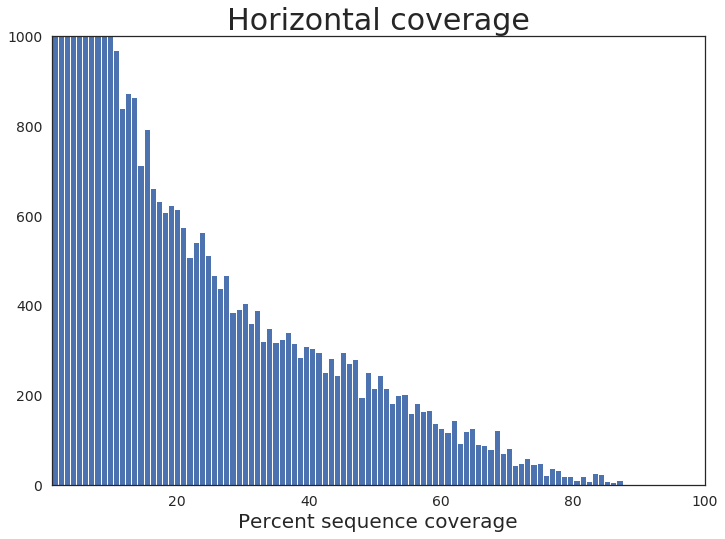

In [28]:
#percent sequence coverage
plt.hist(perc_cov_dist,bins=100)
plt.xlim(1,100)
plt.ylim(0,1000)
plt.xlabel("Percent sequence coverage",fontsize=20)
plt.title("Horizontal coverage",fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [26]:
print(len(perc_cov_dist))

158229


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text yticklabel objects>)

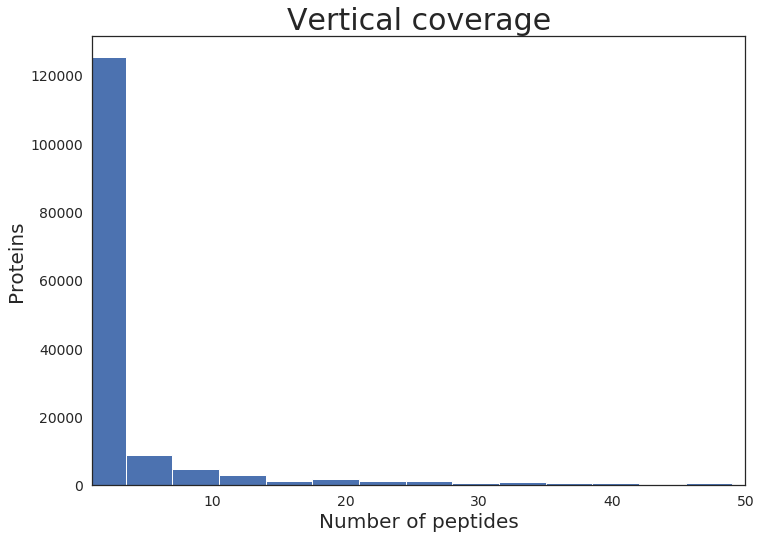

In [32]:
#peptides per protein (vertical coverage)
plt.hist(vert_cov,bins=1000)
plt.xlim(1,50)
plt.xlabel("Number of peptides",fontsize=20)
plt.ylabel("Proteins",fontsize=20)
plt.title("Vertical coverage",fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [1]:
#number of above-threshold hits reference
len(ib_mutout_human)

NameError: name 'ib_mutout_human' is not defined

In [19]:
#number of above-threshold hits reference + ont
len(ib_mutout_human_ont)

94022

In [19]:
#how many multiple mapped?
#number of unique proteins
d=ib_mutout_ont["proteins"]
count_mult=0
all_prots=set()
for prot in d:
    if '||' in prot:
        count_mult+=1
        prot=prot.split('||')
        for p in prot:
            all_prots.add(p)
    else:
        all_prots.add(prot)
print(len(all_prots))
print(count_mult)

23193
48185


In [41]:
#check if peptide come from same gene or matched to multiple
from collections import Counter
def parse_prots(list_prots):
    '''collects the genes associated with the proteins and returns a list of genes (less than or equal to length of protein list)'''
    gl=set()
    for p in list_prots:
        if '_EN' in p:
            if '|m.' in p:
                p=p.split('|')[0]
            pl=p.split('_')[1]
            pl=pl.split('-')[0]
            gl.add(pl)
        else:
            pl=p.split('|')
            for ele in pl:
                if 'ENSG' in ele:
                    gl.add(ele)
                    break
    return(gl)

def parse_transcript(list_prots):
    '''per gene, how many different transcripts?'''
    gl=set()
    for p in list_prots:
        if '_EN' in p:
            if '|m.' in p:
                p=p.split('|')[0]
            pl=p.split('_')[0]
            gl.add(pl)
        else:
            pl=p.split('|')
            for ele in pl:
                if 'ENST' in ele:
                    gl.add(ele)
                    break
    return(gl)

count_single=0
count_double=0
count_multi=0
ct=Counter()
d=ib_mutout_human_ont["proteins"]
for prot in d:
    if '||' in prot:
        prot=prot.split('||')
        genelist=parse_prots(prot)
        if len(genelist)==1:
            count_single+=1
            trlist=parse_transcript(prot)
            ct[len(trlist)]+=1
        elif len(genelist)==2:
            count_double+=1
        elif len(genelist)>2:
            count_multi+=1
print(count_single, count_double, count_multi)
print(ct.most_common(10))

62060 12487 8594
[(2, 11212), (3, 10623), (4, 9013), (5, 7143), (6, 5192), (7, 3679), (8, 3293), (9, 2381), (10, 1507), (11, 1271)]


In [ ]:
#check if peptide match (in case of both ont and transcript) match to same gene

In [10]:
d=ib_mutout_human_ont["proteins"].head(1)
d.iloc[0]
#d.iloc[1]

'ENSP00000421592.2|ENST00000505490.2|ENSG00000183684.7|OTTHUMG00000160470.2|OTTHUMT00000360729.2|ALYREF-202|ALYREF|264'

In [51]:
ib_mutout_human_ont.head()

,scan_id,charge,precursor_mass,matched_peptide,modifications,ionbot_psm_score,DB,unexpected_modification,ms2pip_pearsonr,proteins,...,percolator_psm_score,q_value,PEP,ri_126.1277,ri_127.1311,ri_128.1344,ri_129.1378,ri_130.1411,ri_131.1382,title
10,211,4,1636.943,NRPAIVRGAAGGGGR,0|[737]tmt6plex||6|mut,4.015,T,A->V,0.845,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,...,0.914,0.001,0.004,4485.211,3463.388,4170.723,3324.770,5085.466,4119.196,"Linfeng_011011_HapMap35_10.746.746.4 File:""Lin..."
11,53604,2,1347.695,QYNGVPLDGR,0|[737]tmt6plex||3|[7]deamidated[n],5.557,T,[7]deamidated[n],0.833,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,...,1.930,0.000,0.000,13493.468,11478.784,12715.669,11120.964,15806.749,12475.679,"Linfeng_011011_HapMap35_3.9565.9565.2 File:""Li..."
13,111129,3,1653.871,MDMSLDDIIK,0|[737]tmt6plex||1|[35]oxidation[m]||10|[737]t...,5.244,T,NaN,0.906,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,...,0.148,0.006,0.119,11922.566,17945.445,14594.153,14752.497,12632.057,10176.357,"Linfeng_011011_HapMap35_6.19692.19692.3 File:""..."
14,132008,3,3042.566,QYNGVPLDGRPMNIQLVTSQIDAQR,0|[737]tmt6plex||3|[7]deamidated[n],6.820,T,[7]deamidated[n],0.937,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,...,3.317,0.000,0.000,11028.458,15392.277,24423.994,15567.110,32967.141,27598.090,"Linfeng_011011_HapMap35_7.19011.19011.3 File:""..."
15,45615,3,1613.852,AGSQGARGGGAQAAAR,0|[737]tmt6plex||6|mut,5.822,T,G->A,0.943,ENSP00000421592.2|ENST00000505490.2|ENSG000001...,...,1.215,0.000,0.002,1279.255,1837.244,2240.035,1741.897,2058.141,1544.578,"Linfeng_011011_HapMap35_3.673.673.3 File:""Linf..."


In [5]:
#unique protein hits
#ib_mutout_human['proteins'].nunique()
ib_mutout_human_ont['proteins'].nunique()
#ib_mutout_ont['proteins'].nunique()

11748

In [11]:
#how many hits required a single amino acid substitution in each of the search dictionaries
modhit_human_ont=ib_mutout_human_ont.dropna(subset=['unexpected_modification'])
#len(modhit_human_ont) #number of hits with modificaiotn
muthit_human_ont=modhit_human_ont[modhit_human_ont['unexpected_modification'].str.contains('->')]
#len(muthit_human_ont) #nubmer of hits with mutation
muthit_human_ont['proteins'].nunique() #number of unique proteins that had a mutated peptide detected

752

In [81]:
#venn diagram multiple mapping the combination set
ref_only=set()
ont_only=set()
ont_only_prot={}
both=set()
def bin_hits_by_source(scanid,ids,oro,ono,ob):
    '''sort peptide hits by their source dictionary'''
    ref_only=oro
    ont_only=ono
    both=ob
    ont=False
    ref=False
    for i in ids:
        if '|m.' in i: #assumes that the proteins from the reference were not generated with ANGEL
            ont=True
        elif 'ENST' in i:
            ref=True
    if ont and ref:
        both.add(scanid)
    elif ont:
        ont_only.add(scanid)
    elif ref:
        ref_only.add(scanid)
    else:
        raise Exception('Unexpected protein found')
    return(ref_only,ont_only,both)
            

10942


In [21]:
len(compare_combi_ref_unmatched)/2

819.0

In [86]:
both

{131076,
 131086,
 131096,
 131101,
 131107,
 131110,
 131115,
 131121,
 131123,
 131134,
 131140,
 131141,
 131146,
 131148,
 131152,
 131160,
 131163,
 131165,
 131170,
 131175,
 131178,
 131179,
 131180,
 131182,
 131185,
 131190,
 131191,
 131192,
 131193,
 131196,
 131198,
 131202,
 138,
 131215,
 131216,
 131217,
 131220,
 131222,
 131224,
 131225,
 131228,
 131232,
 131235,
 131236,
 131240,
 131241,
 131243,
 175,
 131251,
 131255,
 183,
 131259,
 188,
 131264,
 131268,
 131273,
 131279,
 131282,
 131283,
 131284,
 131290,
 131293,
 131295,
 131299,
 131305,
 131307,
 131311,
 131317,
 131318,
 131326,
 131327,
 131332,
 131338,
 131342,
 131343,
 131344,
 131346,
 131348,
 131352,
 285,
 131368,
 131383,
 131385,
 131387,
 131388,
 131391,
 131397,
 131404,
 131417,
 131418,
 131423,
 131432,
 131433,
 131434,
 360,
 131436,
 131435,
 368,
 131451,
 131452,
 381,
 131458,
 131459,
 131466,
 131472,
 131473,
 131488,
 131490,
 131494,
 131499,
 428,
 131504,
 131506,
 131507,
 

In [12]:
p=ib_mutout_human_ont.loc[ib_mutout_human_ont['scan_id']==10702,'proteins']
p.iloc[0]

IndexError: single positional indexer is out-of-bounds

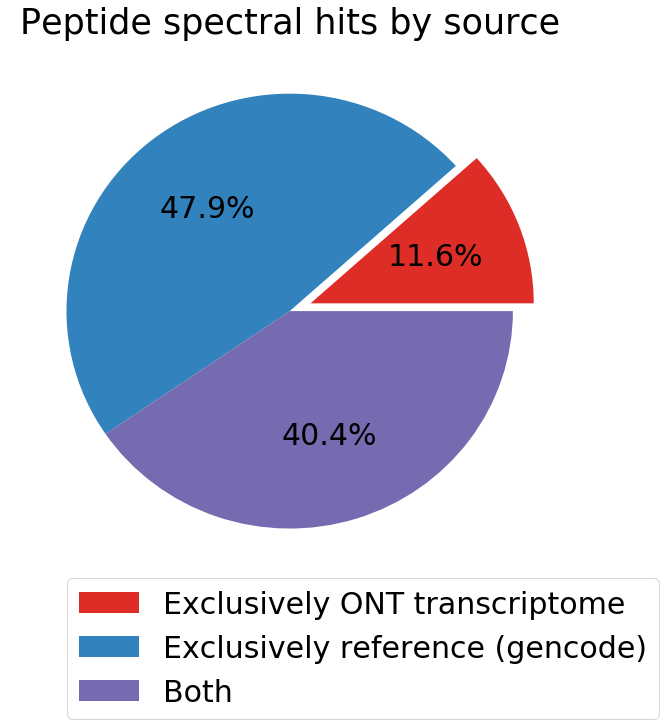

In [91]:
matplotlib.rcParams['axes.titlesize'] = 'xx-large'
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['font.size'] = 30
explode = (0.1, 0, 0)
labels='Exclusively ONT transcriptome','Exclusively reference (gencode)', 'Both'
plt.pie([len(ont_only),len(ref_only),len(both)],autopct='%1.1f%%', explode=explode,colors=['#de2d26','#3182bd','#756bb1'])
plt.title('Peptide spectral hits by source',fontsize=35)
plt.legend(labels,loc = (0.1,-0.25))
plt.show()


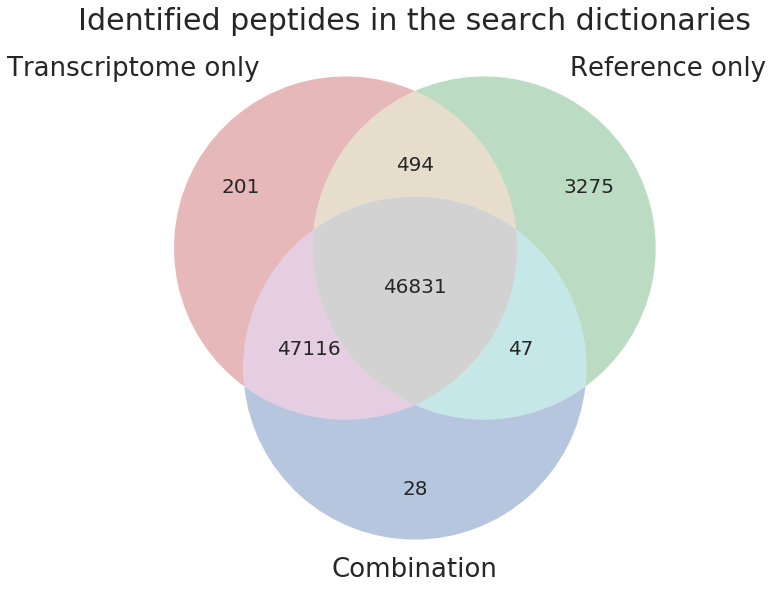

In [33]:
matplotlib.rcParams['axes.titlesize'] = 'xx-large'
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['font.size'] = 30
prot_ont=set(ib_mutout_ont['scan_id'].tolist())
prot_ref=set(ib_mutout_human['scan_id'].tolist())
prot_ref_ont=set(ib_mutout_human_ont['scan_id'].tolist())
results_list=[prot_ont,prot_ref,prot_ref_ont]
results_union = set().union(*results_list)
total = len(results_union)
#vd=venn3_unweighted(results_list, ('Transcriptome only','Reference only', 'Combination'),subset_label_formatter=lambda x: f"{(x/total):0.01%}")
vd=venn3_unweighted(results_list, ('Transcriptome only','Reference only', 'Combination'))
plt.title("Identified peptides in the search dictionaries",fontsize=30)
for text in vd.set_labels:
    text.set_fontsize(26)
for text in vd.subset_labels:
    text.set_fontsize(20)
#vd.get_label_by_id('010').set_text('276 (0.2%)')
#vd.get_label_by_id('001').set_text('501 (0.0%)')
#vd.get_label_by_id('100').set_text('3275 (3.3%)')
#vd.get_label_by_id('011').set_text('47116 (48.1%)')
#vd.get_label_by_id('110').set_text('')
#vd.get_label_by_id('101').set_text('314 (0.0%)')
#vd.get_label_by_id('111').set_text('49705 (47.8%)')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


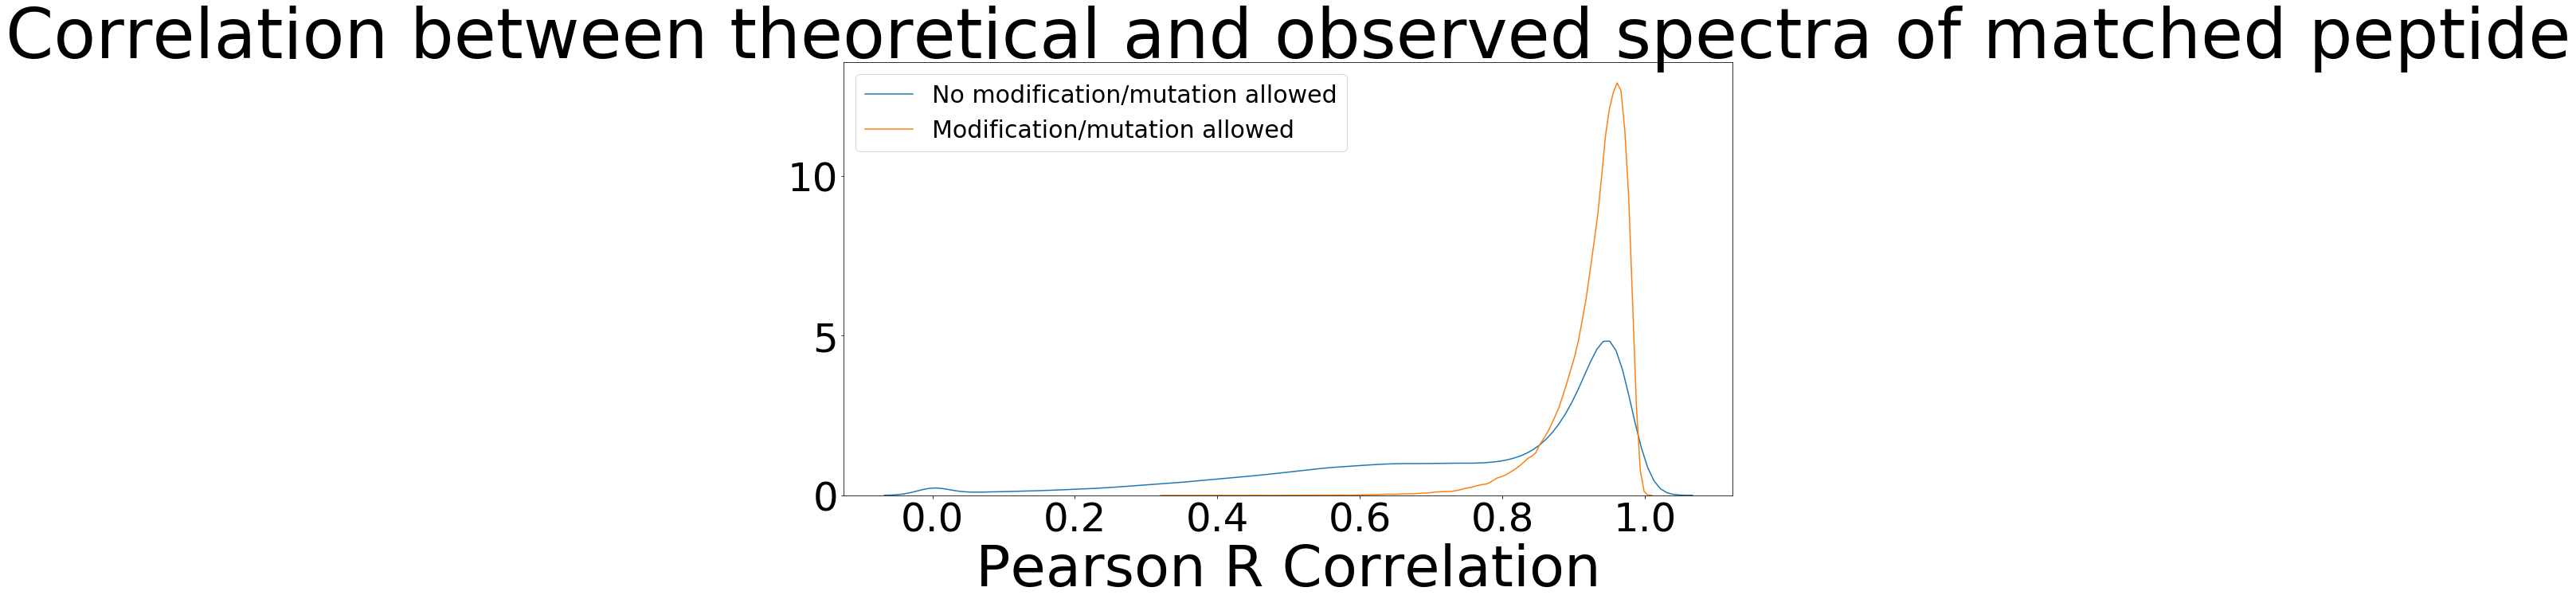

In [18]:
#plot score distributions comparing allowing mutation vs. not allowing mutation on human reference
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='white')
plt.figure("Pearson R distribution")
#matplotlib.rcParams['figure.figsize'] = (40.0, 20.0)
#matplotlib.rcParams['font.size'] = 50
sns.distplot(ib_nomutout['ms2pip-pearsonr'], hist=False, label='No modification/mutation allowed',axlabel='Pearson R Correlation')
sns.distplot(ib_mutout_human['ms2pip_pearsonr'], hist=False, label='Modification/mutation allowed',axlabel='Pearson R Correlation')
#plt.legend(prop={'size':25})
#plt.tick_params(labelsize=22)
#plt.xlabel("Pearson R correlation",fontsize=22)
plt.legend(prop={'size':30})
plt.title('Correlation between theoretical and observed spectra of matched peptide')
plt.show()

In [56]:
def quality_control(ib_mutout_human_ont,cpdt_pep):
    list_mutated=set()
    list_strange=set() #list_strange are all the proteins that had a peptide found that did not match any of the cpdt peptides
    list_nohits=set() #list_nohits should be empty unless the hits contain something that the cpdt file does not
    #unmatched={}
    unmatched=0
    for row in ib_mutout_human_ont.iterrows():
        protein=''
        pep=row[1][3]
        mod=str(row[1][7])
        if '||' in row[1][9]:
            ids=row[1][9].split('||')
        else:
            ids=[row[1][9]]
        if '->' in mod:
            for i in ids:
                list_mutated.add(i)
        for i in ids:
            found=False
            if '|m.' in i:
                i=i.split('|m.')[0]
            if i in cpdt_pep.keys():
                ispeplist=cpdt_pep[i]
                newpl=ispeplist #make copy to mutate as you iterate
                for p,ct in ispeplist.items():
                    if p==pep:
                        ct+=1
                        newpl[p]=ct
                        found=True
                cpdt_pep[i]=newpl
                #if '->' not in mod and found==False:
                 #   if pep in full_seqs[i] or 'X' in full_seqs[i]:
                 #       newpl[pep]=1
                 #       cpdt_pep[i]=newpl
                 #   else:
                  #      list_strange.add(i)
            else:
                list_nohits.add(i)
    return(list_mutated,list_strange,list_nohits)

In [29]:
#import the full list of coding transcripts - not needed?
transcript_ids=[]
sources=['/data/data/genome_grch38/gencode.v29.pc_translations.fa','/data/data/spectra/dictionary/dumb_orfprediction_setA/flair.setA.final.pep']
for f in sources:
    with open(f) as handle:
        for line in handle:
            if line.startswith('>'):
                if ' ' in line.strip():
                    tid=line.split(' ')[0]
                    transcript_ids.append(tid[1:])
                else:
                    transcript_ids.append(line.strip()[1:])

In [82]:
##check if the multiple matched proteins- agreement 
#compare_combi_ref=pd.DataFrame()
compare_combi_ref_matched=pd.DataFrame()
compare_combi_ref_unmatched=pd.DataFrame()
count=0
for sid in both:
    #count+=1
    #if count > 1000:
    #    break
    if sid in ib_mutout_human['scan_id'].tolist():
        row=ib_mutout_human[ib_mutout_human['scan_id']==sid]
        row2=ib_mutout_human_ont[ib_mutout_human_ont['scan_id']==sid]
        #rownew=row.merge(row2,left_on='scan_id',right_on='scan_id')
        p_h=ib_mutout_human.loc[ib_mutout_human['scan_id']==sid,'proteins']
        p_h=p_h.iloc[0]
        p_oh=ib_mutout_human_ont.loc[ib_mutout_human_ont['scan_id']==sid,'proteins']
        p_oh=p_oh.iloc[0]
        if p_h in p_oh:
            compare_combi_ref_matched=compare_combi_ref_matched.append(row)
            compare_combi_ref_matched=compare_combi_ref_matched.append(row2)
        else:
            compare_combi_ref_unmatched=compare_combi_ref_unmatched.append(row)
            compare_combi_ref_unmatched=compare_combi_ref_unmatched.append(row2)
        #compare_combi_ref=compare_combi_ref.append(row)
        #compare_combi_ref=compare_combi_ref.append(row2)

KeyboardInterrupt: 